In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [123]:
lakes = ["06015200","29007100","31078400","56038200","08004500"]

In [124]:
lakes_data = [pd.read_csv(f"Resources/{x}_catch.csv",converters={"lake_ID": str}) for x in lakes]

In [125]:
lakes_df = pd.concat(lakes_data)
lakes_df["survey_date"] = pd.to_datetime(lakes_df["survey_date"],format="%Y-%m-%d")
lakes_df.head()

,lake_ID,CPUE,averageWeight,gear,gearCount,quartileCount,quartileWeight,species,survey_ID,survey_date,totalCatch,totalWeight
0,06015200,1.45,0.11,Standard gill nets,20.0,0.8-11.0,0.2-0.4,WHC,117389,1987-09-01,29,3.3
1,06015200,20.60,0.48,Standard gill nets,20.0,0.8-7.1,NaN,WHB,117389,1987-09-01,412,197.3
2,06015200,0.25,0.84,Standard gill nets,20.0,0.3-3.6,0.5-0.9,YEB,117389,1987-09-01,5,4.2
3,06015200,1.75,2.77,Standard gill nets,20.0,1.2-7.8,1.5-3.0,NOP,117389,1987-09-01,35,96.9
4,06015200,0.10,8.10,Standard gill nets,20.0,NaN,NaN,CCF,117389,1987-09-01,2,16.2


In [127]:
species = input("Enter a species to compare: ")

Enter a species to compare: BLG


In [128]:
lake_boxplot_cpue_list = []
for lakeid in lakes:
    species_cpue = lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["gear"] == "Standard gill nets") & \
                                (lakes_df["lake_ID"] == lakeid), "CPUE"]
    lake_boxplot_cpue_list.append(species_cpue)

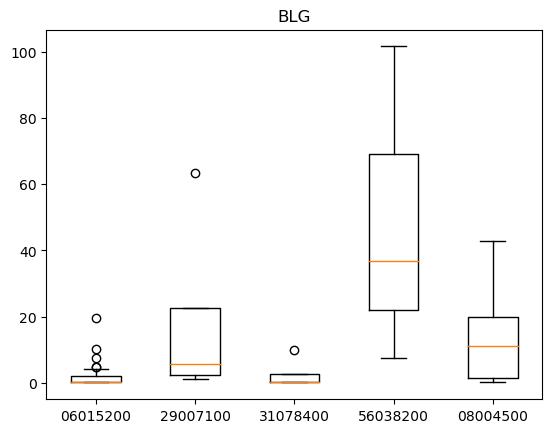

In [129]:
plt.boxplot(lake_boxplot_cpue_list)
labels = lakes
ticks = range(1, len(lakes)+1)
plt.xticks(ticks=ticks, labels=labels)
plt.title(species)
plt.show()

In [149]:
lake_scatter_cpue_list = []
lake_scatter_survey_date_list = []
for lakeid in lakes:
    species_cpue = lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["gear"] == "Standard gill nets") & \
                                (lakes_df["lake_ID"] == lakeid), "CPUE"]
    species_survey_date = lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["gear"] == "Standard gill nets") & \
                                (lakes_df["lake_ID"] == lakeid), "survey_date"]
    lake_scatter_cpue_list.append(species_cpue)
    lake_scatter_survey_date_list.append(species_survey_date)

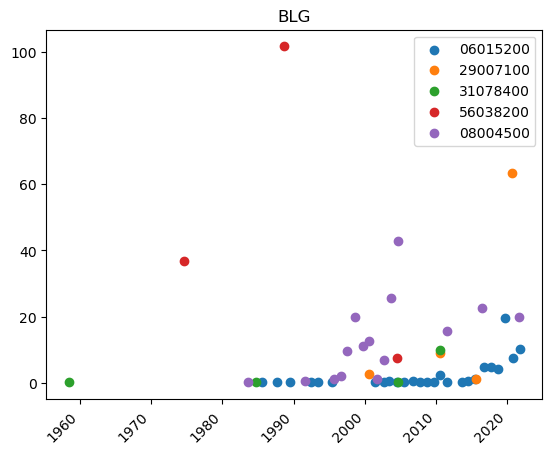

In [156]:
for _ in range(len(lakes)):
    plt.scatter(lake_scatter_survey_date_list[_],lake_scatter_cpue_list[_], label=lakes[_])
    plt.title(species)
    plt.xticks(rotation=45, ha="right")
    plt.legend(loc="best")
plt.show()